## Imports

In [1]:
#Do imports just once and for all
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, norm

from wordcloud import WordCloud

#instead of popup, plot images inline
%matplotlib inline

# SVD Analysis


In [26]:

path = "../src/files/"
s = np.load(path + "svd.s.npy")
Ut = np.load(path + "svd.Ut.npy")
V = np.load(path + "svd.V.npy")
k = np.load(path + "svd.k.npy")
docs = np.load(path + "svd.docs.npy")
vocab = np.load(path + "tfidf.vocab.npy")
SiUt = inv(np.diag(s)).dot(Ut)

## Scree-Plot

[1, array(200), 0, 402.10306]

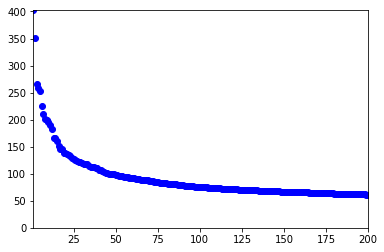

In [27]:
plt.plot(range(1,k+1),s[::-1], 'bo') #s is irgendwie falsch rum bei SVD Sparse -> [::-1] dreht den vector um
plt.axis([1, k, 0, s.max()])

## Word Clouds

In [43]:
topic = 5#to select the correct row in Ut(topic-term) and column in V (doc-topic)
n = 50

##### Calculate Dict for Term Cloud
topic_terms_mask = np.argsort(Ut[topic,:])[::-1][:n]#Ut[topic,:] > 0
topic_terms_values = Ut[topic,topic_terms_mask]
topic_terms_vocab = vocab[topic_terms_mask]
topic_terms_dict = dict(zip(topic_terms_vocab, topic_terms_values))
#print(topic_terms_dict)

##### Calculate Dict for News Groups Cloud (based on Doc. Paths)
#Group Result By News Groups and sum there values
topic_docs_paths_ng = np.array([i.split('/')[0] for i in docs])
topic_docs_paths_ng_unique = np.unique(topic_docs_paths_ng)
topic_docs_values_sum = np.array([np.sum(V[topic_docs_paths_ng==ng,topic]) for ng in topic_docs_paths_ng_unique])

#Partition in positiv and negative
topic_docs_mask_pos = topic_docs_values_sum>0
topic_docs_mask_neg = topic_docs_values_sum<0

#Create Dict
topic_docs_dict_pos = dict(zip(topic_docs_paths_ng_unique[topic_docs_mask_pos], topic_docs_values_sum[topic_docs_mask_pos]))
topic_docs_dict_neg = dict(zip(topic_docs_paths_ng_unique[topic_docs_mask_neg], topic_docs_values_sum[topic_docs_mask_neg]*(-1)))
#print(topic_docs_dict)

### Influencing Terms

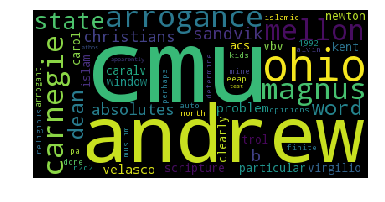

In [44]:
wordcloud = WordCloud().generate_from_frequencies(topic_terms_dict)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

### Positive Influencing News Groups

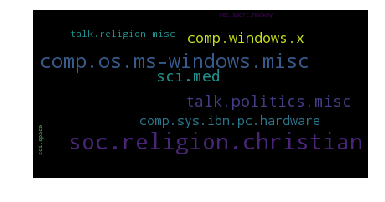

In [45]:
wordcloud = WordCloud().generate_from_frequencies(topic_docs_dict_pos)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

### Negative Influencing News Groups

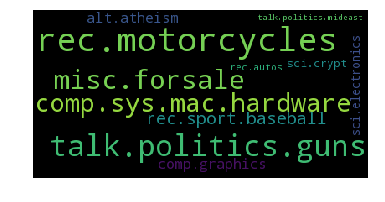

In [46]:
wordcloud = WordCloud().generate_from_frequencies(topic_docs_dict_neg)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

## TESTS

In [16]:
topic_docs_dict_neg

{'alt.atheism': 0.8007381,
 'comp.graphics': 0.67557573,
 'comp.os.ms-windows.misc': 0.038397655,
 'comp.sys.ibm.pc.hardware': 0.66686243,
 'comp.sys.mac.hardware': 0.82667071,
 'comp.windows.x': 0.70660114,
 'misc.forsale': 0.80854189,
 'rec.sport.baseball': 1.1635078,
 'rec.sport.hockey': 0.070409879,
 'sci.crypt': 0.21523941,
 'sci.electronics': 0.74295926,
 'sci.space': 1.3845031,
 'talk.religion.misc': 1.1493965}

In [17]:
topic_docs_dict_pos

{'rec.autos': 1.8052384,
 'rec.motorcycles': 2.252769,
 'sci.med': 1.4156394,
 'soc.religion.christian': 0.8128435,
 'talk.politics.guns': 0.14655367,
 'talk.politics.mideast': 0.14988369,
 'talk.politics.misc': 0.69424832}

In [42]:
len(vocab)

126381

In [48]:
V.shape

(11314, 200)

In [49]:
max(V[:,1])

0.1534704

In [54]:
sum(V[:,1])

0.12968289799391641

In [52]:
s

array([  61.45283127,   61.57301712,   61.61895752,   61.72421265,
         61.76960373,   61.92547607,   61.98186493,   62.12444305,
         62.23005295,   62.26987457,   62.35392761,   62.43579865,
         62.63331223,   62.71141815,   62.71425629,   62.86933899,
         62.95147324,   63.00860977,   63.11343384,   63.32772827,
         63.36651993,   63.4927063 ,   63.57286453,   63.68739319,
         63.78322983,   63.87995529,   64.0371933 ,   64.16894531,
         64.22264099,   64.36248779,   64.42938232,   64.66924286,
         64.73592377,   64.85066223,   65.02574921,   65.08142853,
         65.28404999,   65.30725098,   65.53939056,   65.59576416,
         65.67353058,   65.82711029,   65.96678925,   66.09301758,
         66.17066193,   66.22512054,   66.48574066,   66.54769897,
         66.63473511,   66.82086182,   66.94737244,   66.98669434,
         67.10491943,   67.13508606,   67.28574371,   67.5187912 ,
         67.66845703,   67.80698395,   67.99235535,   68.07582